## Load data

In [1]:
import pandas as pd

# Load the data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# Specify the name of the columns
df.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class']

# Features
features = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']

# Get the features
X = df[features].values

# Get the target
y = df['Class'].values

## Data preprocessing

In [2]:
from sklearn.preprocessing import LabelEncoder

# The label encoder for the target
le = LabelEncoder()

# Encode the target
y = le.fit_transform(y)

In [3]:
from sklearn.preprocessing import StandardScaler

# The StandardScaler
scaler = StandardScaler()

# Standardize the features
X = scaler.fit_transform(X)

## Feature importance given by Random forest

In [4]:
from sklearn.ensemble import RandomForestClassifier

# Declare the classifier
rfc = RandomForestClassifier(random_state=0)

# Train the classifier
rfc.fit(X, y)

# Get the feature importances
importances = rfc.feature_importances_

## The histogram of feature importance

Petal width     0.489820
Petal length    0.368047
Sepal length    0.118965
Sepal width     0.023167
dtype: float64


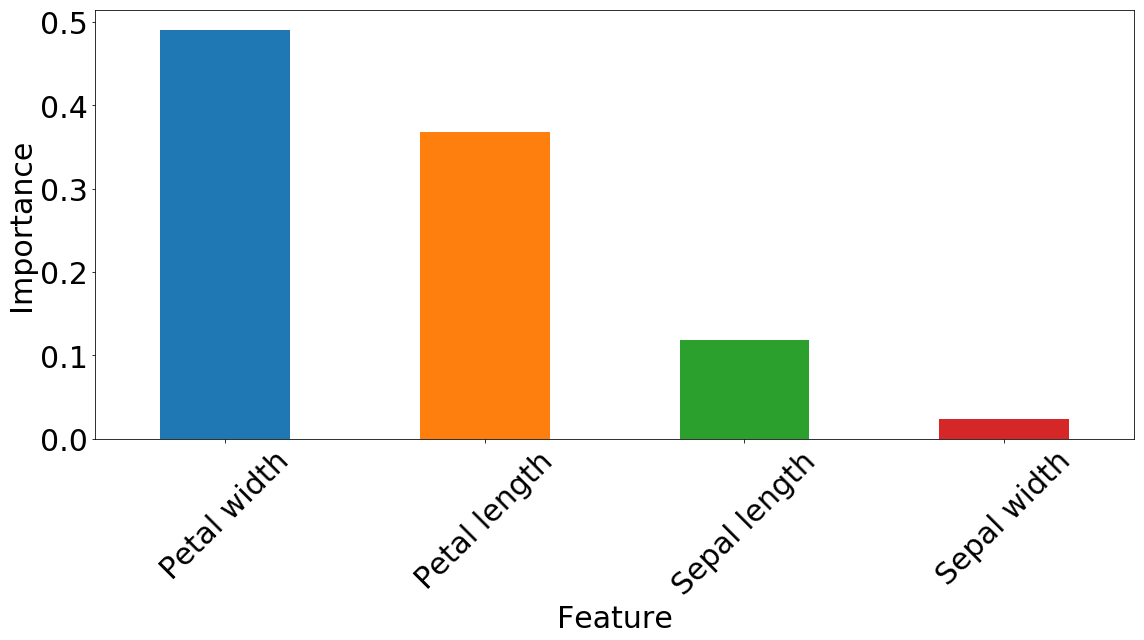

In [5]:
import matplotlib.pyplot as plt

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, features)

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

print(f_importances)

# Make the bar plot from f_importances 
f_importances.plot(kind='bar', figsize=(16,9), rot=45, fontsize=30)

plt.xlabel('Feature', fontsize=30)
plt.ylabel('Importance', fontsize=30)

# Show the bar plot of feature importance
plt.tight_layout()
plt.savefig('iris_rf.pdf', dpi=300)
plt.show()

## Get the subset of data

In [6]:
import numpy as np

# Get the x values
X = scaler.inverse_transform(X)
x_col = features.index('Petal width')
x_vals = X[:, x_col]

# Get the y values
y_col = features.index('Petal length')
y_vals = X[:, y_col]

# Get the color, marker, and label
colors = ["red", "blue", "green"]
markers = ["o", "*", "s"]
labels = ["Setosa", "Versicolor", "Virginca"]

# Get the data
data = {}
for num in range(3):
    data_x = [x_vals[i] for i in range(len(y)) if y[i] == num]
    data_y = [y_vals[i] for i in range(len(y)) if y[i] == num]
    data[num] = [data_x, data_y]

## The three plots

In [7]:
fig, axs = plt.subplots(ncols=3, sharex=True, figsize=(15, 4))

## The scatter plot

In [8]:
ax = axs[0]

for num, color, marker, label in zip(data.keys(), colors, markers, labels):
    x, y = data[num]
    x_idxs = [list(np.unique(x_vals)).index(xi) for xi in x]
    y_idxs = [list(np.unique(y_vals)).index(yi) for yi in y]
    ax.scatter(x_idxs, y_idxs, c=color, marker=marker, s=50, label=label)

ax.legend(loc='lower right', shadow=True, fontsize='x-large')

ax.set_xlabel('Petal width', fontsize=20)
ax.set_xticks([0, 11, 21])
ax.set_xticklabels([0.1, 1.5, 2.5], fontsize=20)

ax.set_ylabel('Petal length', fontsize=20)
ax.set_yticks([0, 21, 42])
ax.set_yticklabels([1.0, 4.5, 6.9], fontsize=20)

[Text(0,0,'1.0'), Text(0,0,'4.5'), Text(0,0,'6.9')]

## The distribution of ala

In [9]:
# Load the distribution file
df = pd.read_csv('iris.csv', header=0)

# Specify the name of the columns
df.columns = ['yu', 'xj', 'xij', 'pij']

df = df.loc[(df['yu'] == "Iris-versicolor") & (df['xj'] == " Petal width")]

# Get the feature values
xijs = df['xij'].values

# Get the probabilities
pijs = df['pij'].values

ax = axs[1]

# Plot the bar chart
ax.bar(range(len(xijs)), pijs, color='blue')
ax.set_xlabel('Petal width', fontsize=20)
ax.set_xticks([0, 11, 21])
ax.set_xticklabels([0.1, 1.5, 2.5], fontsize=20)

ax.set_ylabel('Importance', fontsize=20)
ax.set_ylim([0, 1])
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels([0, 0.5, 1], fontsize=20)

[Text(0,0,'0'), Text(0,0,'0.5'), Text(0,0,'1')]

## The distribution for logistic regression

In [10]:
# Load the distribution file
df = pd.read_csv('iris_lr.csv', header=0)

# Specify the name of the columns
df.columns = ['yu', 'xj', 'xij', 'pij']

df = df.loc[(df['yu'] == "Iris-versicolor") & (df['xj'] == " Petal width")]

# Get the feature values
xijs = df['xij'].values

# Get the probabilities
pijs = df['pij'].values

ax = axs[2]

# Plot the bar chart
ax.bar(range(len(xijs)), pijs, color='blue')
ax.set_xlabel('Petal width', fontsize=20)
ax.set_xticks([0, 11, 21])
ax.set_xticklabels([0.1, 1.5, 2.5], fontsize=20)

ax.set_ylabel('Importance', fontsize=20)
ax.set_ylim([0, 1])
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels([0, 0.5, 1], fontsize=20)

[Text(0,0,'0'), Text(0,0,'0.5'), Text(0,0,'1')]

## Plot

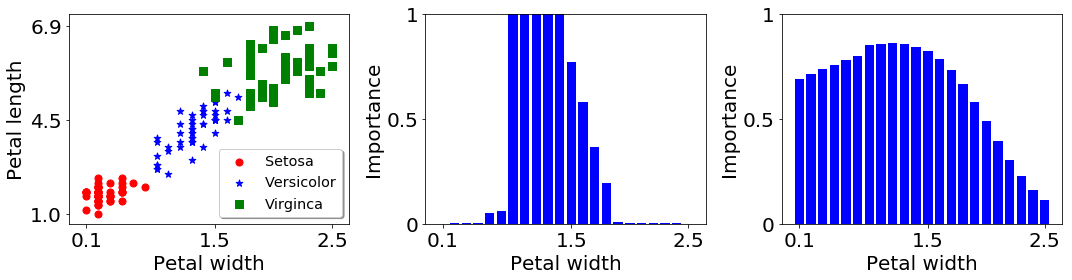

In [11]:
fig.tight_layout()
plt.savefig('scatter_distributions.pdf', dpi=300)
plt.show()